# Text Classification with Machine Learning
CS4395.001 Homework #8

Brendan Lim

In [64]:
import pandas as pd
import numpy as np

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Clickbait Dataset
This clickbait dataset is comprised of two files exclusively containing 16,000 clickbait and regular headlines each. The clickbait headlines were scraped from sites such as Buzzfeed or Scoopwhoop. Non-clickbait headlines were gathered from sites like the New York Times or the Guardian.

The trained model is expected to do binary classification between clickbait or not.

### Citation and Link:
Abhijnan Chakraborty, Bhargavi Paranjape, Sourya Kakarla, and Niloy Ganguly. "Stop Clickbait: Detecting and Preventing Clickbaits in Online News Media”. In Proceedings of the 2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM), San Fransisco[sic], US, August 2016.

https://github.com/bhargaviparanjape/clickbait

In [65]:
#importing the data
data_path = "./dataset/"

clickbait_headlines = []
with open(data_path + "clickbait_data", 'r', encoding='utf-8') as f_handle:
   for line in f_handle:
      if not line.isspace():
         clickbait_headlines.append(line.rstrip())

non_clickbait = []
with open(data_path + "non_clickbait_data", 'r', encoding='utf-8') as f_handle:
   for line in f_handle:
      if not line.isspace():
         non_clickbait.append(line.rstrip())

print(len(clickbait_headlines))
print(len(non_clickbait))

print(clickbait_headlines[0])
print(non_clickbait[0])

15999
16001
Should I Get Bings
Bill Changing Credit Card Rules Is Sent to Obama With Gun Measure Included


In [78]:
#formatting data into a pandas dataframe
clickbait_df = pd.DataFrame(clickbait_headlines)
clickbait_df['clickbait'] = 1

non_clickbait_df = pd.DataFrame(non_clickbait)
non_clickbait_df['clickbait'] = 0

#couldn't get concat to work properly
clickbait_df.append(non_clickbait_df)
df = pd.concat([clickbait_df, non_clickbait_df], axis=0)
df.columns = ["Headline", "clickbait"]

display(df)

C:\Users\blim5\AppData\Local\Temp\ipykernel_17508\3305075031.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clickbait_df.append(non_clickbait_df)


,Headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


### Visualization of Dataset Distribution

<AxesSubplot:>

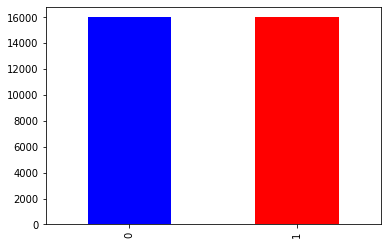

In [67]:
#wow
df['clickbait'].value_counts().plot(kind='bar', color = ['b', 'r'])

In [68]:
#going to use the same split for all model types
x_train, x_test, y_train, y_test = train_test_split(df.Headline, df.clickbait, test_size=0.2, train_size=0.8, random_state=1111)

print(x_train.shape)
print(x_test.shape)

(25600,)
(6400,)


In [69]:
#preprocessing words into a bag of words model
sw = set(stopwords.words('english'))
vect = TfidfVectorizer(stop_words=sw)

V_train = vect.fit_transform(x_train)
V_test = vect.transform(x_test)

print(V_train.shape)
print(V_test.shape)

(25600, 20431)
(6400, 20431)


## Naive Bayes
The Naive Bayes model performed the best 

In [70]:
#training the model
nb = MultinomialNB()
nb.fit(V_train, y_train)

nb_pred = nb.predict(V_test)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3149
           1       0.96      0.97      0.96      3251

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



## Logistic Regression
Logistic Regression also does quite well, albeit a little worse than a Naive Bayes model. We can see with the lower precision and higher recall that this model that it favors calling things not clickbait.

In [71]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
lr.fit(V_train, y_train)

lr_pred = lr.predict(V_test)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3149
           1       0.97      0.93      0.95      3251

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400



## Neural Network
Neural networks did not perform as well as the other ML models in both performance and training time. The training time for a neural network was about 2.0s while the Naive-Bayes and Logistic Regression models took roughly 0.1s. We can see from the results that this neural network just guessed that everything was not clickbait (not very useful!) due to the high recall and low precision score.

In [77]:
nn = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes=(30,2), random_state=1111)

nn.fit(V_train, y_train)
nn_pred = nn.predict(V_test)

print(classification_report(y_test, nn_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3149
           1       0.00      0.00      0.00      3251

    accuracy                           0.49      6400
   macro avg       0.25      0.50      0.33      6400
weighted avg       0.24      0.49      0.32      6400



### Grid Search
Grid Search is an ML methodology where you run each permutation of model given a range of hyperparameters to find the best model hyperparameters. However this requires the training of exponentially increasing amounts of models. The SciKit module for this allows you to immediately use the best model for testing and pickling, as well as various different metrics for determining which model is the best.

Comparing this to the previous neural network, we see the importance of hyperparameter selection and activation function selection.

I used the smaller test set to train these models since I'm training 27 models.

In [73]:
from sklearn.model_selection import GridSearchCV

nn = MLPClassifier(solver='lbfgs')
# check each 
params = {
    'hidden_layer_sizes' : [(x,2) for x in range(10,100,10)],
    'activation' : ['logistic', 'tanh', 'relu']
}
gridsearch = GridSearchCV(nn, param_grid=params, n_jobs=-1, cv = 5)
gridsearch.fit(V_test, y_test)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs'), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 2), (20, 2), (30, 2),
                                                (40, 2), (50, 2), (60, 2),
                                                (70, 2), (80, 2), (90, 2)]})

In [74]:
#get the parameters 
print(gridsearch.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (80, 2)}


   param_activation  mean_test_score
0          logistic         0.507969
1          logistic         0.507969
2          logistic         0.507969
3          logistic         0.507969
4          logistic         0.590000
5          logistic         0.591406
6          logistic         0.589063
7          logistic         0.591250
8          logistic         0.507969
9              tanh         0.918750
10             tanh         0.921719
11             tanh         0.921250
12             tanh         0.919844
13             tanh         0.919375
14             tanh         0.917969
15             tanh         0.921406
16             tanh         0.922500
17             tanh         0.920469
18             relu         0.755000
19             relu         0.840312
20             relu         0.674531
21             relu         0.837812
22             relu         0.671562
23             relu         0.674531
24             relu         0.672031
25             relu         0.590781
2

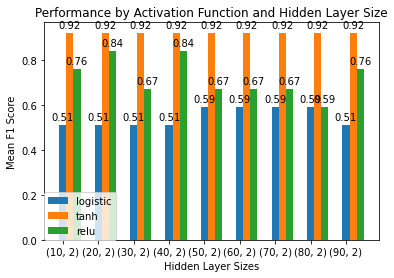

In [75]:
#displaying grid search results
gs_results = pd.DataFrame(gridsearch.cv_results_)

filtered_results = gs_results.filter(items = ["param_activation","hidden_layer_sizes","mean_test_score"])

print(filtered_results)

#convert df to filtered dictionary
activation_functions = ['logistic', 'tanh', 'relu']
results_dict = {}

for a in activation_functions:
   results_dict[a] = filtered_results.loc[filtered_results["param_activation"]  == a]["mean_test_score"]

fig, ax = plt.subplots()

bar_width = 0.2
offset_mult = 0
x_ticks = np.arange(9)

#figure
for a, m in results_dict.items():
   offset = bar_width * offset_mult
   bar = ax.bar(x_ticks + offset, [round(datum,2) for datum in m], bar_width, label=a)
   ax.bar_label(bar, padding=3)
   offset_mult += 1

#axes
ax.set_title("Performance by Activation Function and Hidden Layer Size")
ax.set_xlabel("Hidden Layer Sizes")
ax.set_ylabel("Mean F1 Score")
ax.set_xticks(ticks = x_ticks, labels = [str(l) for l in params["hidden_layer_sizes"]])
ax.legend(loc=(0,0))

plt.show()


In [76]:
#running the optimal model
gs_pred = gridsearch.predict(V_train)

print(classification_report(y_train,gs_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     12852
           1       0.90      0.96      0.93     12748

    accuracy                           0.93     25600
   macro avg       0.93      0.93      0.93     25600
weighted avg       0.93      0.93      0.93     25600

